In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


In [62]:

train_data = pd.read_csv('train-clean.csv',delimiter=",")
# GETTING THE NULL VALUES
train_data.dtypes

customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
month                          object
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
term_deposit_subscribed         int64
mid_month                       int64
dtype: object

In [63]:
input_names = list(train_data.columns)
input_names.remove('term_deposit_subscribed')

all_inputs = train_data[input_names].values
all_labels = train_data['term_deposit_subscribed'].values

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

""" categorical_features = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'month', 'prev_campaign_outcome']
encoder = OneHotEncoder(handle_unknown='ignore')
all_inputs_encoded = pd.DataFrame(encoder.fit_transform(all_inputs[categorical_features]).toarray())
all_inputs_encoded.columns = encoder.get_feature_names(categorical_features)
all_inputs_encoded.index = all_inputs.index
all_inputs_encoded = pd.concat([all_inputs.drop(categorical_features, axis=1), all_inputs_encoded], axis=1) """

all_inputs_df = pd.DataFrame(all_inputs, columns=input_names)
categorical_features = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'month', 'prev_campaign_outcome']
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_feature_indices = [all_inputs_df.columns.get_loc(col) for col in categorical_features]
all_inputs_encoded = pd.DataFrame(encoder.fit_transform(all_inputs_df.iloc[:, categorical_feature_indices]).toarray())
all_inputs_encoded.columns = encoder.get_feature_names(categorical_features)
all_inputs_encoded.index = all_inputs_df.index
all_inputs_encoded = pd.concat([all_inputs_df.drop(categorical_features, axis=1), all_inputs_encoded], axis=1)






In [65]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs_encoded.values, all_labels, test_size=0.25, random_state=1)
# Split the encoded dataset into training and testing sets
#(training_inputs, 
# testing_inputs,
# training_classes,
# testing_classes) = train_test_split(all_inputs_encoded.values, all_labels.values, test_size=0.25, random_state=1)



In [66]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
scaler.fit(training_inputs)
training_inputs = scaler.transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)  

#scaler = StandardScaler()
#training_inputs[:, :-32] = scaler.fit_transform(training_inputs[:, :-32])
#testing_inputs[:, :-32] = scaler.transform(testing_inputs[:, :-32])

training_inputs

array([[-0.69280058, -0.31957411,  0.92288898, ..., -0.18931703,
        -0.17624758, -2.22335309],
       [ 1.18836903,  0.71799145, -0.52895821, ..., -0.18931703,
        -0.17624758,  0.44977112],
       [ 1.37648599,  4.29530713,  1.1735336 , ..., -0.18931703,
        -0.17624758,  0.44977112],
       ...,
       [-0.69280058, -0.62702414, -0.44856277, ..., -0.18931703,
        -0.17624758, -2.22335309],
       [-2.10367779,  0.10121289,  1.14988788, ..., -0.18931703,
        -0.17624758, -2.22335309],
       [-0.22250818, -0.40097636, -0.24048043, ..., -0.18931703,
        -0.17624758,  0.44977112]])

In [71]:
# Create the classifier
clf = MLPClassifier(max_iter=700)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
clf.score(testing_inputs, testing_classes)

0.9034643297275092

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = clf.predict(testing_inputs)
print(classification_report(testing_classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6602
           1       0.50      0.51      0.50       701

    accuracy                           0.90      7303
   macro avg       0.72      0.73      0.72      7303
weighted avg       0.90      0.90      0.90      7303



In [70]:
improved_clf = MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=50, max_iter=700)

# Train the classifier on the training set
improved_clf.fit(training_inputs, training_classes)
new_predictions = improved_clf.predict(testing_inputs)
print(classification_report(testing_classes, new_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6602
           1       0.51      0.49      0.49       701

    accuracy                           0.90      7303
   macro avg       0.73      0.72      0.72      7303
weighted avg       0.90      0.90      0.90      7303



Text(0.5, 1.0, 'Average score: 0.9082163642588155')

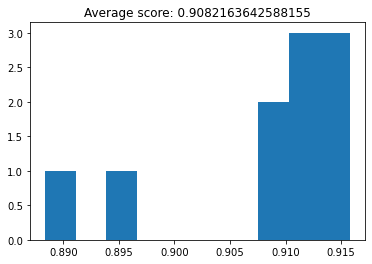

In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_inputs_encoded, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameter_grid = {
    'solver': ['adam'],
    'activation' : ['tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01], 
    'hidden_layer_sizes': [10, 50, 100],
    'max_iter' : [700]}


cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    MLPClassifier(), 
    param_grid=parameter_grid, 
    cv=cross_validation,
    verbose=3)

grid_search.fit(all_inputs_encoded, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.901, total=   3.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.908, total=   3.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.898, total=   3.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.901, total=   3.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.900, total=   3.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam, score=0.893, total=   5.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam, score=0.907, total=   6.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam 


/Users/sofiagoncalves/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=100, max_iter=500, solver=adam, score=0.905, total=   8.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.901, total=   7.7s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.901, total=   6.3s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.901, total=   7.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam, score=0.880, total=   6.6s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=500, solver=adam 
[CV]  activation=t

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  8.5min finished


Best score: 0.9142759328996919
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 50, 'max_iter': 500, 'solver': 'adam'}
Best estimator: MLPClassifier(activation='logistic', hidden_layer_sizes=50, max_iter=500)
